In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import load_img

grayscale, resizing, normalization on images and adding labels for each image

In [62]:
label = []
input_path = []
drive_path = []
dir = "S:\Downloads\spectrograms-20221003T124515Z-001\spectrograms"
drive_dir = "/content/drive/MyDrive/Colab Notebooks/spectrograms-20221003T124515Z-001/spectrograms"

for class_name in os.listdir(dir):
    for path in os.listdir(dir+"/"+class_name):
        if class_name == "0":
            label.append("air conditioner")
        elif class_name == "1":
            label.append("car horn")
        elif class_name == "2":
            label.append("children playing")
        elif class_name == "3":
            label.append("dog bark")
        elif class_name == "4":
            label.append("drilling")
        elif class_name == "5":
            label.append("engine idling")
        elif class_name == "6":
            label.append("gun shot")
        elif class_name == "7":
            label.append("jackhammer")
        elif class_name == "8":
            label.append("siren")
        else:
            label.append("street music")
        input_path.append([os.path.join(dir,class_name,path)])
        drive_path.append([os.path.join(drive_dir,class_name,path)])


check

In [63]:
print(len(input_path))
print(len(label))
print(len(drive_path))
print(input_path[0])


8732
8732
8732
['S:\\Downloads\\spectrograms-20221003T124515Z-001\\spectrograms\\0\\100852-0-0-0.png']


In [70]:
#process on images in input_path, resize, normalization, grayscale
for i in range(len(input_path)):
    img = cv2.imread(input_path[i][0])
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255
    input_path[i] = img

creating dataframe

In [ ]:
df = pd.DataFrame()
df['input_path'] = input_path
df['drive_path'] = drive_path
df["labels"] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,input_path,drive_path,labels
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[/content/drive/MyDrive/Colab Notebooks/spectr...,engine idling
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[/content/drive/MyDrive/Colab Notebooks/spectr...,air conditioner
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[/content/drive/MyDrive/Colab Notebooks/spectr...,street music
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[/content/drive/MyDrive/Colab Notebooks/spectr...,air conditioner
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[/content/drive/MyDrive/Colab Notebooks/spectr...,siren


showing the pictures

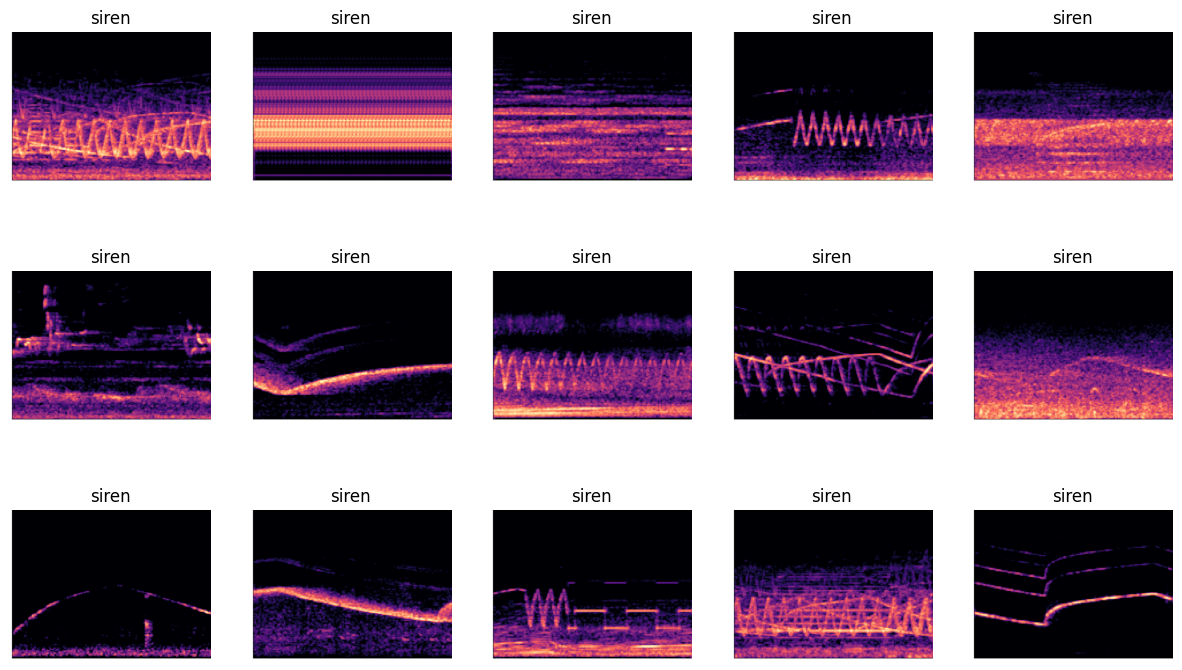

In [ ]:
plt.figure(figsize=(15,15))
template = df[df['labels'] == 'siren']['input_path']
air_random = random.randint(0,len(template))
files = template[air_random:air_random+15]
for index, file in enumerate(files):
    plt.subplot(5,5,index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title("siren")
    plt.axis('off')



In [ ]:
print(df.shape)
print(df['labels'].unique())

(8732, 3)
['street music' 'engine idling' 'gun shot' 'siren' 'air conditioner'
 'jackhammer' 'dog bark' 'car horn' 'children playing' 'drilling']


creating train, val and test sets

In [ ]:
#creating train, validation and test sets
df['input_path'] = df['input_path'].astype('str')
df['drive_path'] = df['drive_path'].astype('str')
X_train, X_temporary, y_train, y_temporary = train_test_split(df['input_path'], df['labels'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, test_size=0.5, random_state=42)

In [ ]:
print(type(X_train))
print(len(X_val))
print(len(X_test))
print(len(y_train))
print(len(y_val))
print(len(y_test))

<class 'pandas.core.series.Series'>
1310
1310
6112
1310
1310


In [ ]:
#saving to pc train, test, val sets for tensorflow as txt
X_train.to_csv('X_train.txt', index=False, header=False)
X_val.to_csv('X_val.txt', index=False, header=False)
X_test.to_csv('X_test.txt', index=False, header=False)
y_train.to_csv('y_train.txt', index=False, header=False)
y_val.to_csv('y_val.txt', index=False, header=False)
y_test.to_csv('y_test.txt', index=False, header=False)



In [ ]:
#saving as file train, validation and test sets
np.save("X_train",X_train)
np.save("X_val",X_val)
np.save("X_test",X_test)
np.save("y_train",y_train)
np.save("y_val",y_val)
np.save("y_test",y_test)

